# DSP for Beginners

This is a brief introduction into DSP using coding examples to make it easier to understand.



In [5]:
#Basic imports to get system running
import matplotlib.pylab as plt
import numpy as np
import random as random

To begin we will generate a sine wave and plot it.

\begin{align}
waveform & = A\sin(\omega t + \phi)
\end{align}

\begin{align}
waveform & = A\sin(2 \pi f t + \phi)
\end{align}

\begin{align}
f~i~/m & = fs/n
\end{align}

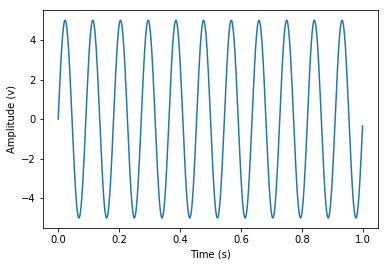

In [10]:
A = 5 #Amplitude of sine (In Volts)
fi = 11 #Frequency of sine, omega (In Hz)
p = 0 #Phase of sine

n = 1000 #Number of samples
fs = 1000 #Samples per second
m = int(fi/(fs/n)) #Bin of the fundemental THIS MUST BE A INTERGER!

t = np.arange(0, (1/fs)*n, 1/fs)

#Create amplitudes for sine using t and sine function
waveform = A*np.sin(2*np.pi*fi*t+p)

#Add gausian noise to waveform
waveform = list(map(lambda x: x+random.uniform(0.000, 0.001), waveform))

plt.plot(t, waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (v)')
plt.axis('tight')
plt.show()

## FFT in Linear Magnitude
The units of magnitude are in Voltage peak

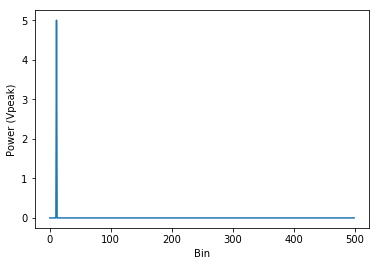

In [12]:
#Take fft of sine wave above
fft_linear = np.fft.fft(waveform)

#There were m samples taken of the sine wave
fft_linear = fft_linear[0:int(n/2)];

#This returns a real and imaginary component

fft_linear = np.sqrt(fft_linear.real**2 + fft_linear.imag**2)

# Witchcraft to scale to Amplitude peak
fft_linear = fft_linear * 2 / n

plt.plot(fft_linear)
plt.xlabel('Bin')
plt.ylabel('Power (Vpeak)')
plt.axis('tight')
plt.show()

## FFT in Linear Power
The units of power are in Voltage squared

\begin{align}
P = I V = I^2 R = \frac{V^2}{R}
\end{align}

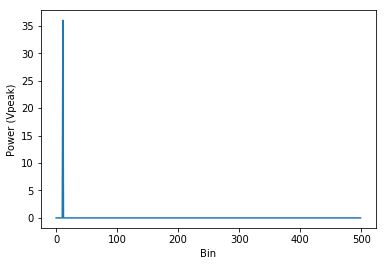

In [8]:
fft_power = fft_linear**2

plt.plot(fft_power)
plt.xlabel('Bin')
plt.ylabel('Power (Vpeak)')
plt.axis('tight')
plt.show()

## FFT in dBV
Because 

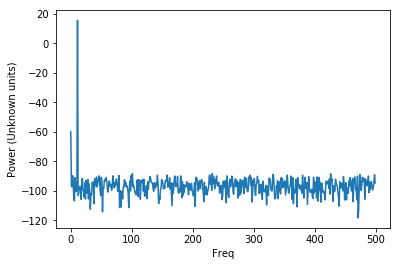

In [9]:
plot_fft_dB = 20 * np.log10(fft_linear)

plt.plot(plot_fft_dB)
plt.xlabel('Freq')
plt.ylabel('Power (Unknown units)')
plt.axis('tight')
plt.show()

## Noise
What the floor of the system is

In [420]:
Noise_Lin = np.sqrt(sum(fft_linear[0:int(m)]**2)+sum(fft_linear[int(m+1):]**2))

print(20*np.log10(Noise_Lin))

-59.3977453909


## SNR:
To calculate SNR, do the Root Sum Square of every element besides the fundemental of the Linear FFT.
In some cases this will exclude some or all of the harmonics as well. This in more advanced scenario can include harmonic wrapping due to nyquist

In [421]:
SNR_Lin = fft_linear[m]/Noise_Lin

print(20* np.log10(SNR_Lin))

73.3771696219


## THD
Total Harmonic Distortion

In [ ]:
SNR_Lin = np.sqrt(sum(fft_linear[0:int(m)]**2)+sum(fft_linear[int(m+1):]**2))

SNR_Lin = fft_linear[m]/SNR_Lin
print(20* np.log10(SNR_Lin))